In [88]:
import os
import pandas as pd

In [89]:
# Load the DataFrame from the .pickle file
load_path = r"D:\Research\Python\Data\WIP\RNN_sentiment_Full.pickle"
df = pd.read_pickle(load_path)

# Rename the 'RNN_SENTIMENT' column to 'Sentiment'
df.rename(columns={'RNN_SENTIMENT': 'Sentiment'}, inplace=True)
df['Sentiment'] = df['Sentiment'].fillna(0)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877305 entries, 0 to 3088931
Data columns (total 15 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Datetime                  datetime64[ns]
 1   Tweet Id                  int64         
 2   Original Text             object        
 3   Username                  object        
 4   date                      object        
 5   keyword                   object        
 6   Text                      object        
 7   Mentions                  object        
 8   Hashtags                  object        
 9   URL Removed Text          object        
 10  Emoji Removed Text        object        
 11  Character Processed Text  object        
 12  StopWordRemovedText       object        
 13  Text_Lemmatized           object        
 14  Sentiment                 int64         
dtypes: datetime64[ns](1), int64(2), object(12)
memory usage: 351.2+ MB


<H2> 1. Descriptive stats </>

<h4>1.1 Histogram per sentiment </.>

Sentiment Distribution Information:
Sentiment -1: Count = 444767, Percentage = 15.5%
Sentiment 0: Count = 1549980, Percentage = 53.9%
Sentiment 1: Count = 882558, Percentage = 30.7%
Total Data Points: 2877305


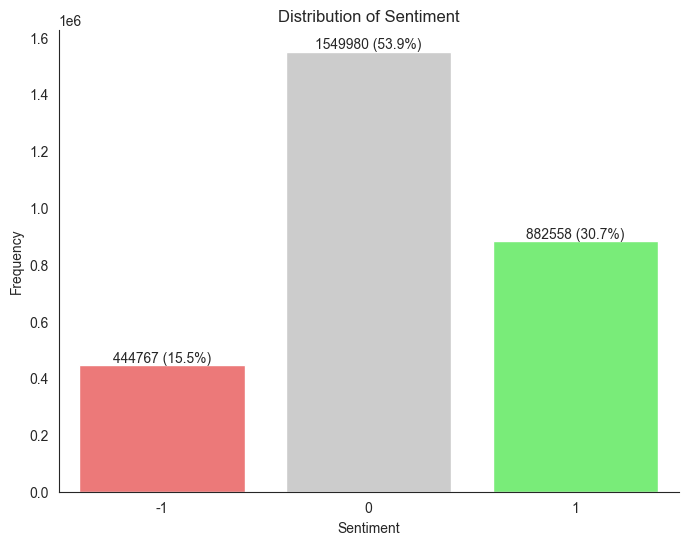

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_values = df['Sentiment']

# Calculate counts and percentages of each sentiment value
sentiment_counts = sentiment_values.value_counts()
total_data_points = len(sentiment_values)
sentiment_percentages = sentiment_counts / total_data_points * 100

# Define custom colors for each sentiment
custom_palette = {'negative': '#FF6666', 'neutral': '#CCCCCC', 'positive': '#66FF66'}

# Sort sentiment_counts and sentiment_percentages by index (sentiment value)
sentiment_counts = sentiment_counts.sort_index()
sentiment_percentages = sentiment_percentages.sort_index()

# Set the seaborn style to a minimal one
sns.set_style("white")

# Plot the bar plot with the custom color palette and metrics
plt.figure(figsize=(8, 6))
sns.countplot(x=sentiment_values, palette=custom_palette.values())
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment')

# Remove top and right spines for cleaner appearance
sns.despine()

# Annotate the plot with metrics
for i, count in enumerate(sentiment_counts):
    sentiment = sentiment_counts.index[i]
    percentage = sentiment_percentages.iloc[i]
    plt.annotate(f"{count} ({percentage:.1f}%)", xy=(i, count), ha='center', va='bottom')

# Show the sentiment distribution information
print("Sentiment Distribution Information:")
for sentiment, count in sentiment_counts.items():
    percentage = sentiment_percentages[sentiment]
    print(f"Sentiment {sentiment}: Count = {count}, Percentage = {percentage:.1f}%")

# Show the total number of data points
print(f"Total Data Points: {total_data_points}")

plt.show()


<h4>1.2 Sentiment By keywords </.>

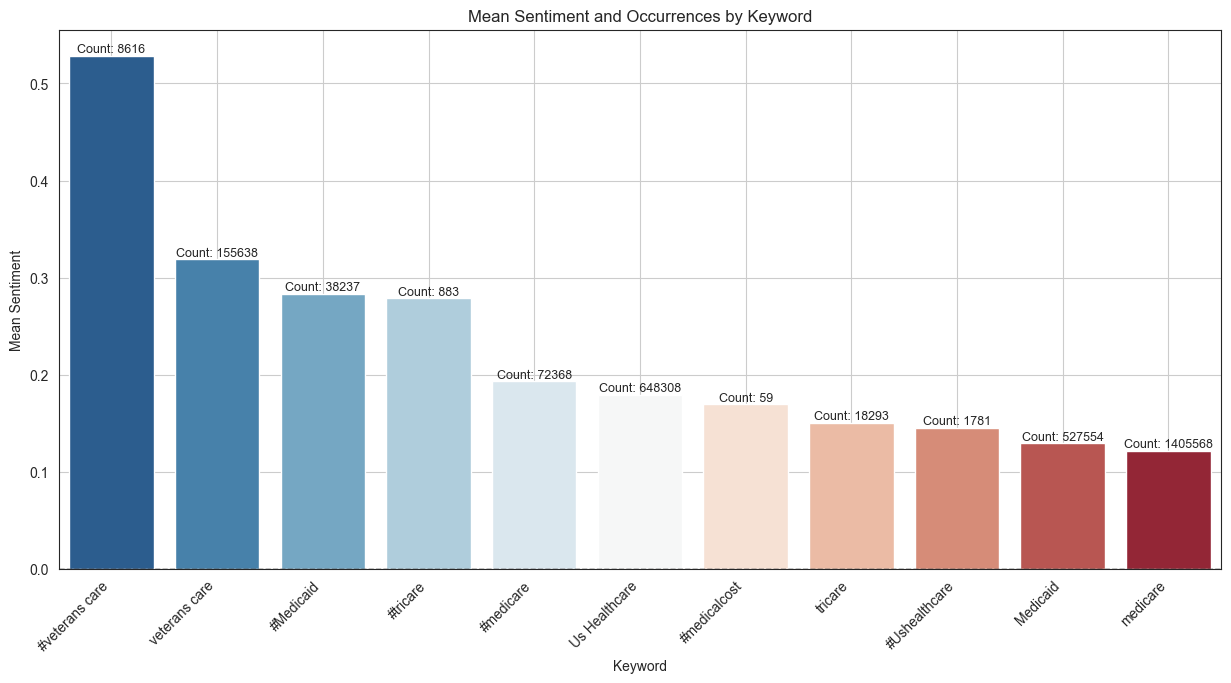

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_subset = df[['keyword', 'Sentiment']]

# Calculate the mean sentiment for each keyword
mean_sentiment_by_keyword = df_subset.groupby('keyword')['Sentiment'].mean()

# Sort keywords by mean sentiment in descending order
mean_sentiment_by_keyword = mean_sentiment_by_keyword.sort_values(ascending=False)

# Calculate the count of occurrences for each keyword
keyword_counts = df_subset['keyword'].value_counts()

# Define a custom diverging color palette with inverted colors
custom_palette = sns.color_palette("RdBu", n_colors=len(mean_sentiment_by_keyword))[::-1]

# Set the neutral value for the diverging plot
neutral_value = 0

# Plot the diverging bar chart with inverted colors
plt.figure(figsize=(15, 7))
sns.barplot(x=mean_sentiment_by_keyword.index, y=mean_sentiment_by_keyword, palette=custom_palette)
plt.axhline(y=neutral_value, color='k', linewidth=1, linestyle='dashed')  # Add a dashed line at the neutral value
plt.xlabel('Keyword')
plt.ylabel('Mean Sentiment')
plt.title('Mean Sentiment and Occurrences by Keyword')
plt.xticks(rotation=45, ha='right')

# Add annotations for the count of occurrences on each bar
for index, value in enumerate(mean_sentiment_by_keyword):
    plt.text(index, value, f'Count: {keyword_counts[mean_sentiment_by_keyword.index[index]]}', 
             ha='center', va='bottom', fontsize=9)

plt.grid(True)
plt.show()


In [92]:
# Print the number of occurrences for each keyword
keyword_counts = df_subset['keyword'].value_counts()
print("Number of occurrences for each keyword:")
print(keyword_counts)

# Print the sentiment value for each keyword
print("\nMean Sentiment for each keyword:")
print(mean_sentiment_by_keyword)

Number of occurrences for each keyword:
keyword
medicare          1405568
Us Healthcare      648308
Medicaid           527554
veterans care      155638
#medicare           72368
#Medicaid           38237
tricare             18293
#veterans care       8616
#Ushealthcare        1781
#tricare              883
#medicalcost           59
Name: count, dtype: int64

Mean Sentiment for each keyword:
keyword
#veterans care    0.528784
veterans care     0.318945
#Medicaid         0.283364
#tricare          0.278596
#medicare         0.193152
Us Healthcare     0.179470
#medicalcost      0.169492
tricare           0.150440
#Ushealthcare     0.145424
Medicaid          0.129644
medicare          0.121495
Name: Sentiment, dtype: float64


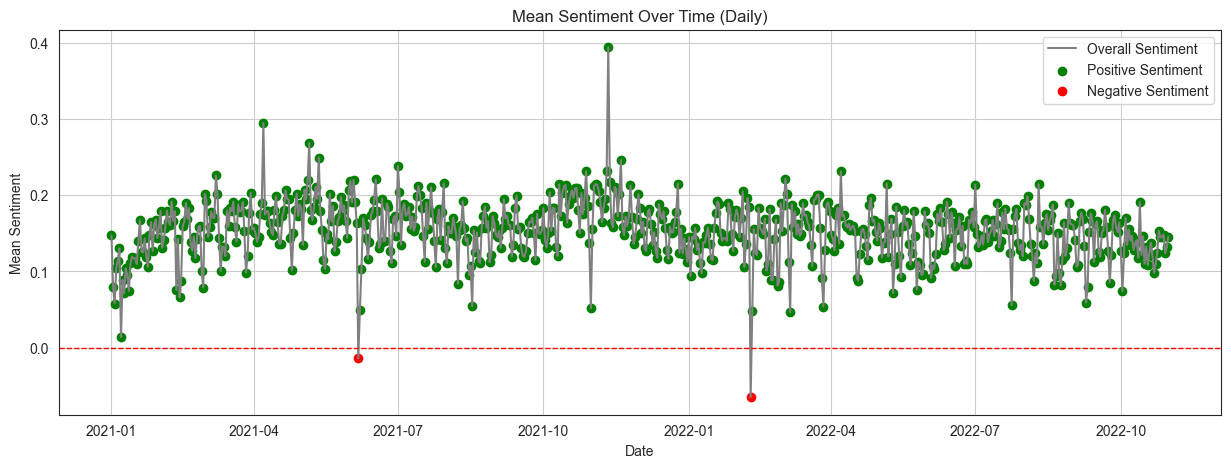

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

df_subset = df.loc[:, ['Datetime', 'Sentiment']]

# Convert 'Datetime' to datetime type
df_subset['Datetime'] = pd.to_datetime(df_subset['Datetime'])

# Resample the data to daily frequency and calculate the mean sentiment
df_daily_sentiment = df_subset.resample('D', on='Datetime').mean()

# Filter positive and negative sentiments
positive_sentiment = df_daily_sentiment[df_daily_sentiment['Sentiment'] > 0]
negative_sentiment = df_daily_sentiment[df_daily_sentiment['Sentiment'] < 0]

# Plot the daily mean sentiment (positive and negative)
plt.figure(figsize=(15, 5))
# Set the DPI to 250 and save the plot as an image file
plt.savefig('sentiment_plot.png', dpi=250)
plt.plot(df_daily_sentiment.index, df_daily_sentiment['Sentiment'], label='Overall Sentiment', color='gray')
plt.scatter(positive_sentiment.index, positive_sentiment['Sentiment'], color='green', label='Positive Sentiment')
plt.scatter(negative_sentiment.index, negative_sentiment['Sentiment'], color='red', label='Negative Sentiment')
plt.axhline(0, color='red', linestyle='--', lw=1)  # Add a horizontal line at y=0 for better visualization
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.title('Mean Sentiment Over Time (Daily)')
plt.grid(True)
plt.legend()
plt.show()


In [94]:
# Get the 3 highest and 3 lowest points
highest_points = df_daily_sentiment.nlargest(3, 'Sentiment')
lowest_points = df_daily_sentiment.nsmallest(3, 'Sentiment')

# Print the highest and lowest points
print("Three Highest Points:")
print(highest_points)
print("\nThree Lowest Points:")
print(lowest_points)

Three Highest Points:
            Sentiment
Datetime             
2021-11-11   0.394354
2021-04-07   0.294979
2021-05-06   0.268597

Three Lowest Points:
            Sentiment
Datetime             
2022-02-09  -0.065199
2021-06-06  -0.014334
2021-01-07   0.013647


Sentiment Spikes Detected:
Sentiment Spike detected on: 2021-11-11
Sentiment Spike detected on: 2021-04-07
Sentiment Spike detected on: 2021-05-06
Sentiment Spike detected on: 2022-03-27
Sentiment Spike detected on: 2021-10-31
Sentiment Spike detected on: 2021-06-07
Sentiment Spike detected on: 2022-02-10
Sentiment Spike detected on: 2022-03-06
Sentiment Spike detected on: 2021-01-07
Sentiment Spike detected on: 2021-06-06
Sentiment Spike detected on: 2022-02-09


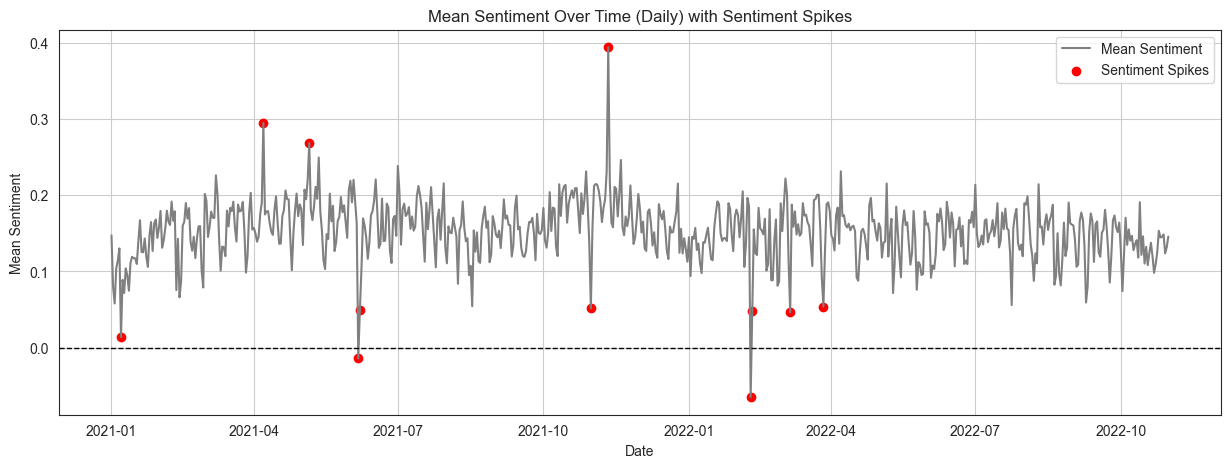

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df_subset = df.loc[:, ['Datetime', 'Sentiment']]

# Convert 'Datetime' to datetime type (if it's not already)
df_subset['Datetime'] = pd.to_datetime(df_subset['Datetime'])

# Resample the data to daily frequency and calculate the mean sentiment
df_daily_sentiment = df_subset.resample('D', on='Datetime').mean()

# Calculate Z-scores for the mean sentiment values
z_scores = stats.zscore(df_daily_sentiment['Sentiment'])

# Define a threshold for detecting sentiment spikes (you can adjust this as needed)
threshold = 2.6

# Identify sentiment spikes based on the threshold
sentiment_spikes = df_daily_sentiment[abs(z_scores) > threshold]

# Sort sentiment spikes from highest to lowest sentiment
sentiment_spikes = sentiment_spikes.sort_values(by='Sentiment', ascending=False)

# Print the dates of the detected sentiment spikes
print("Sentiment Spikes Detected:")
for date in sentiment_spikes.index:
    print(f"Sentiment Spike detected on: {date.strftime('%Y-%m-%d')}")

# Plot the daily mean sentiment with spikes highlighted
plt.figure(figsize=(15, 5))
plt.plot(df_daily_sentiment.index, df_daily_sentiment['Sentiment'], label='Mean Sentiment', color='gray')
plt.scatter(sentiment_spikes.index, sentiment_spikes['Sentiment'], color='red', label='Sentiment Spikes')
plt.axhline(0, color='black', linestyle='--', lw=1)  # Add a horizontal line at y=0 for better visualization
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.title('Mean Sentiment Over Time (Daily) with Sentiment Spikes')
plt.grid(True)
plt.legend()
plt.show()


DataFrame for Spike 1 (2021-01-26) saved to D:\Research\Python\Data\WIP\Spike Data PELT\Spike_1_2021-01-26.csv
DataFrame for Spike 2 (2021-10-13) saved to D:\Research\Python\Data\WIP\Spike Data PELT\Spike_2_2021-10-13.csv
DataFrame for Spike 3 (2021-11-27) saved to D:\Research\Python\Data\WIP\Spike Data PELT\Spike_3_2021-11-27.csv


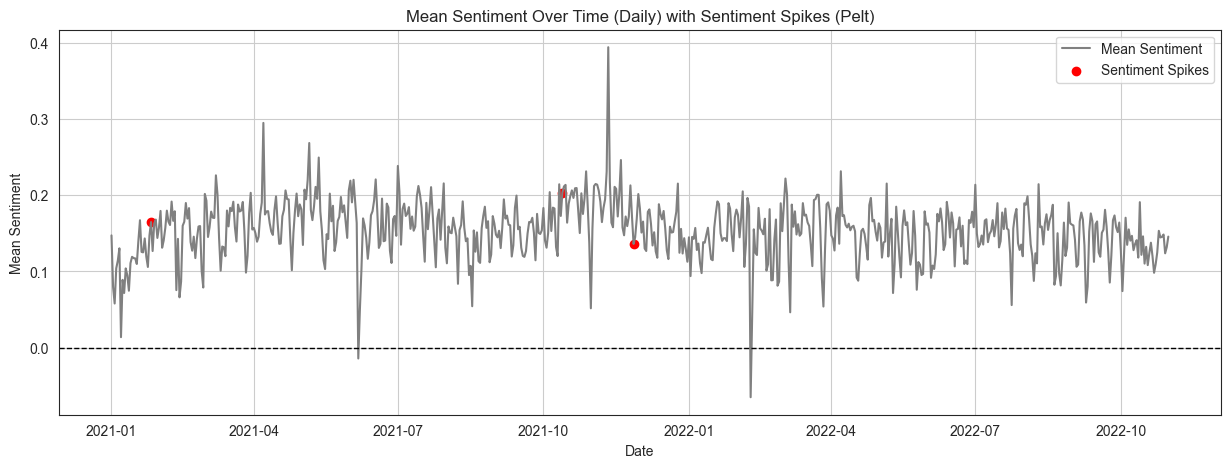

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Assuming 'df' contains the DataFrame with columns 'Datetime' and 'Sentiment'

# Convert 'Datetime' to datetime type (if it's not already)
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Resample the data to daily frequency and calculate the mean sentiment
df_daily_sentiment = df.resample('D', on='Datetime')['Sentiment'].mean()

# Run the change point detection algorithm (Pelt)
algo = rpt.Pelt(model="rbf").fit(df_daily_sentiment.values)
change_points = algo.predict(pen=5)  #pen parameter to control sensitivity

# Get the dates of the detected sentiment spikes
sentiment_spikes = df_daily_sentiment.index[change_points[:-1]]  # Skip the last change point


# Extract the tweets corresponding to the sentiment spikes and save them to CSV files
output_directory = r'D:\Research\Python\Data\WIP\Spike Data PELT'

for i, spike_date in enumerate(sentiment_spikes):
    # Extract the DataFrame corresponding to the current spike
    spike_df = df[df['Datetime'].dt.date == spike_date.date()]
    
    # Save the DataFrame to a CSV file
    filename = f"Spike_{i+1}_{spike_date.strftime('%Y-%m-%d')}.csv"
    filepath = os.path.join(output_directory, filename)
    spike_df.to_csv(filepath, index=False)
    
    print(f"DataFrame for Spike {i+1} ({spike_date.strftime('%Y-%m-%d')}) saved to {filepath}")

# Plot the daily mean sentiment with spikes highlighted
plt.figure(figsize=(15, 5))
plt.plot(df_daily_sentiment.index, df_daily_sentiment, label='Mean Sentiment', color='gray')
plt.scatter(sentiment_spikes, df_daily_sentiment.loc[sentiment_spikes], color='red', label='Sentiment Spikes')
plt.axhline(0, color='black', linestyle='--', lw=1)  # Add a horizontal line at y=0 for better visualization
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.title('Mean Sentiment Over Time (Daily) with Sentiment Spikes (Pelt)')
plt.grid(True)
plt.legend()
plt.show()
